In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [89]:
df = pd.read_csv('..Datos\\datos_1\\df_final.csv', index_col=0)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '..Datos\\datos_1\\df_final.csv'

In [19]:
x= df.drop(columns='price')
y = df[['price']]

In [20]:
y.describe()

,price
count,341.000000
mean,697.316716
std,53.823617
min,500.000000
25%,670.000000
50%,710.000000
75%,749.000000
max,750.000000


In [21]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [23]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [24]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[748.32481261],
       [664.81173967],
       [727.3066468 ]])

In [25]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[663.34376869],
       [667.77068318],
       [718.92731824]])

In [26]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [27]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.327632,33.714042,1958.790866,44.258229
test,0.330094,34.541641,1894.788239,43.529165


Text(0, 0.5, 'Predicciones (y_test_pred)')

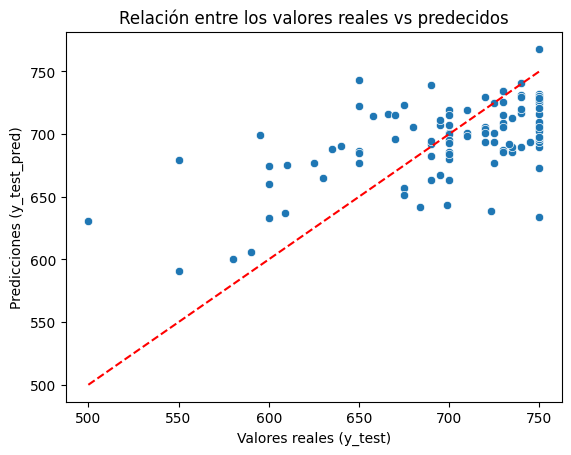

In [28]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

# Cross Validation

## Decision Tree

In [29]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [30]:
params_arbol_4 = {
    'max_depth': [2,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [6,7, 8]
}

In [31]:
params_arbol_3 = {
    'max_depth': [7,10,14],
    'min_samples_split': [10, 30,40],
    'min_samples_leaf': [7, 10],
    'max_leaf_nodes': [7, 8, 9]
}

In [32]:
params_arbol_2 = {
    'max_depth': [5,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [4,5,6,]
}

In [33]:
params_arbol_5 = {
    'max_depth': [10,30,50],
    'min_samples_split': [100, 200, 500],
    'min_samples_leaf': [50,60,81],
    'max_leaf_nodes': [10,20,50]
}

In [34]:
params_arbol_10 = {
    'max_depth': [2,4,7],
    'min_samples_split': [20,30,10],
    'min_samples_leaf': [21,25,30],
    'max_leaf_nodes': [4,6,9,12]
}

## Params 1

In [35]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 7, 10, 14],
                         'max_leaf_nodes': [6, 8, 10, 20, 30],
                         'min_samples_leaf': [10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [36]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [37]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=8, min_samples_leaf=20,
                      min_samples_split=10)

In [38]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [39]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [40]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.303670,34.205042,2028.599102,45.039972
test,0.111935,38.590019,2511.838946,50.118250


# Params 3

In [41]:
grid_search_arbol_3 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_3,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 14], 'max_leaf_nodes': [7, 8, 9],
                         'min_samples_leaf': [7, 10],
                         'min_samples_split': [10, 30, 40]},
             scoring='neg_mean_squared_error')

In [42]:
modelo_final_arbol_3 = grid_search_arbol_3.best_estimator_

In [43]:
y_test_pred_final_3 = modelo_final_arbol_3.predict(x_test)
y_train_pred_final_3 = modelo_final_arbol_3.predict(x_train)

In [44]:
df_metricas_arbol_3 = metricas(y_train, y_train_pred_final_3, y_test, y_test_pred_final_3)

In [45]:
df_metricas_arbol_3

,r2_score,MAE,MSE,RMSE
train,0.338457,33.859633,1927.255056,43.900513
test,0.082664,38.466880,2594.628833,50.937499


## PARAMS 2

In [46]:
grid_search_arbol_2 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_2,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 4, 3], 'max_leaf_nodes': [4, 5, 6],
                         'min_samples_leaf': [18, 20, 21],
                         'min_samples_split': [50, 100, 110]},
             scoring='neg_mean_squared_error')

In [47]:
modelo_final_arbol_2 = grid_search_arbol_2.best_estimator_

In [48]:
modelo_final_arbol_2

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=6, min_samples_leaf=18,
                      min_samples_split=50)

In [49]:
y_test_pred_final_2 = modelo_final_arbol_2.predict(x_test)
y_train_pred_final_2 = modelo_final_arbol_2.predict(x_train)

In [50]:
df_metricas_arbol_2 = metricas(y_train, y_train_pred_final_2, y_test, y_test_pred_final_2)

In [51]:
df_metricas_arbol_2

,r2_score,MAE,MSE,RMSE
train,0.270308,35.214927,2125.789406,46.106284
test,0.113540,37.758289,2507.297858,50.072925


# Params 5

In [52]:
grid_search_arbol_5 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_5.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50],
                         'max_leaf_nodes': [10, 20, 50],
                         'min_samples_leaf': [50, 60, 81],
                         'min_samples_split': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [53]:
modelo_final_arbol_5 = grid_search_arbol_5.best_estimator_

In [54]:
modelo_final_arbol_5

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10, min_samples_leaf=60,
                      min_samples_split=100)

In [55]:
y_test_pred_final_5 = modelo_final_arbol_5.predict(x_test)
y_train_pred_final_5 = modelo_final_arbol_5.predict(x_train)

In [56]:
df_metricas_arbol_5 = metricas(y_train, y_train_pred_final_5, y_test, y_test_pred_final_5)

In [57]:
df_metricas_arbol_5

,r2_score,MAE,MSE,RMSE
train,0.079479,41.550940,2681.727936,51.785403
test,0.084055,39.927575,2590.693678,50.898857


# PARAMS 10

In [58]:
grid_search_arbol_10 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_10,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_10.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 7],
                         'max_leaf_nodes': [4, 6, 9, 12],
                         'min_samples_leaf': [21, 25, 30],
                         'min_samples_split': [20, 30, 10]},
             scoring='neg_mean_squared_error')

In [59]:
modelo_final_arbol_10 = grid_search_arbol_10.best_estimator_

In [60]:
modelo_final_arbol_10

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=9, min_samples_leaf=21,
                      min_samples_split=20)

In [61]:
y_test_pred_final_10 = modelo_final_arbol_10.predict(x_test)
y_train_pred_final_10 = modelo_final_arbol_10.predict(x_train)

In [62]:
df_metricas_arbol_10 = metricas(y_train, y_train_pred_final_10, y_test, y_test_pred_final_10)

In [63]:
df_metricas_arbol_10

,r2_score,MAE,MSE,RMSE
train,0.299648,34.271276,2040.315448,45.169851
test,0.101852,39.041415,2540.357519,50.401959


## Opciones de visualización para mejorar

In [64]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol_2.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.006266,0.002496,0.004759,0.001983,5,6,18,50,"{'max_depth': 5, 'max_leaf_nodes': 6, 'min_sam...",-3213.314354,-2881.940035,-2047.077191,-2282.066857,-2521.841726,-2589.248032,416.648650,1
45,0.003737,0.000982,0.005667,0.002972,4,6,18,50,"{'max_depth': 4, 'max_leaf_nodes': 6, 'min_sam...",-3223.523277,-2881.940035,-2047.077191,-2282.066857,-2521.841726,-2591.289817,419.715607,2
21,0.018109,0.026587,0.006053,0.003961,5,6,20,50,"{'max_depth': 5, 'max_leaf_nodes': 6, 'min_sam...",-3213.314354,-2881.940035,-2118.058346,-2288.866383,-2521.841726,-2604.804169,397.670688,3
48,0.005781,0.000681,0.003511,0.000646,4,6,20,50,"{'max_depth': 4, 'max_leaf_nodes': 6, 'min_sam...",-3223.523277,-2881.940035,-2118.058346,-2288.866383,-2521.841726,-2606.845953,400.803624,4
24,0.005556,0.002050,0.024137,0.039404,5,6,21,50,"{'max_depth': 5, 'max_leaf_nodes': 6, 'min_sam...",-3208.306700,-2900.051649,-2157.987041,-2276.186692,-2618.731274,-2632.252671,388.702517,5
51,0.005061,0.001587,0.004062,0.001354,4,6,21,50,"{'max_depth': 4, 'max_leaf_nodes': 6, 'min_sam...",-3218.515623,-2900.051649,-2157.987041,-2276.186692,-2618.731274,-2634.294456,391.738023,6
36,0.007774,0.002391,0.003898,0.001183,4,5,18,50,"{'max_depth': 4, 'max_leaf_nodes': 5, 'min_sam...",-3223.523277,-2948.525918,-2101.409395,-2321.462974,-2664.995471,-2651.983407,406.728434,7
9,0.004646,0.000965,0.003463,0.000174,5,5,18,50,"{'max_depth': 5, 'max_leaf_nodes': 5, 'min_sam...",-3223.523277,-2948.525918,-2101.409395,-2321.462974,-2664.995471,-2651.983407,406.728434,7
39,0.008545,0.006547,0.024037,0.028124,4,5,20,50,"{'max_depth': 4, 'max_leaf_nodes': 5, 'min_sam...",-3223.523277,-2948.525918,-2193.479348,-2321.462974,-2664.995471,-2670.397398,382.763361,9
12,0.004376,0.000584,0.005374,0.004424,5,5,20,50,"{'max_depth': 5, 'max_leaf_nodes': 5, 'min_sam...",-3223.523277,-2948.525918,-2193.479348,-2321.462974,-2664.995471,-2670.397398,382.763361,9


In [65]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
18,5,6,18,50,-2589.248032
45,4,6,18,50,-2591.289817
21,5,6,20,50,-2604.804169
48,4,6,20,50,-2606.845953
24,5,6,21,50,-2632.252671
...,...,...,...,...,...
60,3,4,21,50,-2756.112245
33,4,4,21,50,-2756.112245
6,5,4,21,50,-2756.112245
69,3,5,21,50,-2762.185300


In [66]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [67]:
df_rmse_prof

,param_max_depth,MSE
0,3,52.174798
1,4,51.972807
2,5,51.970624


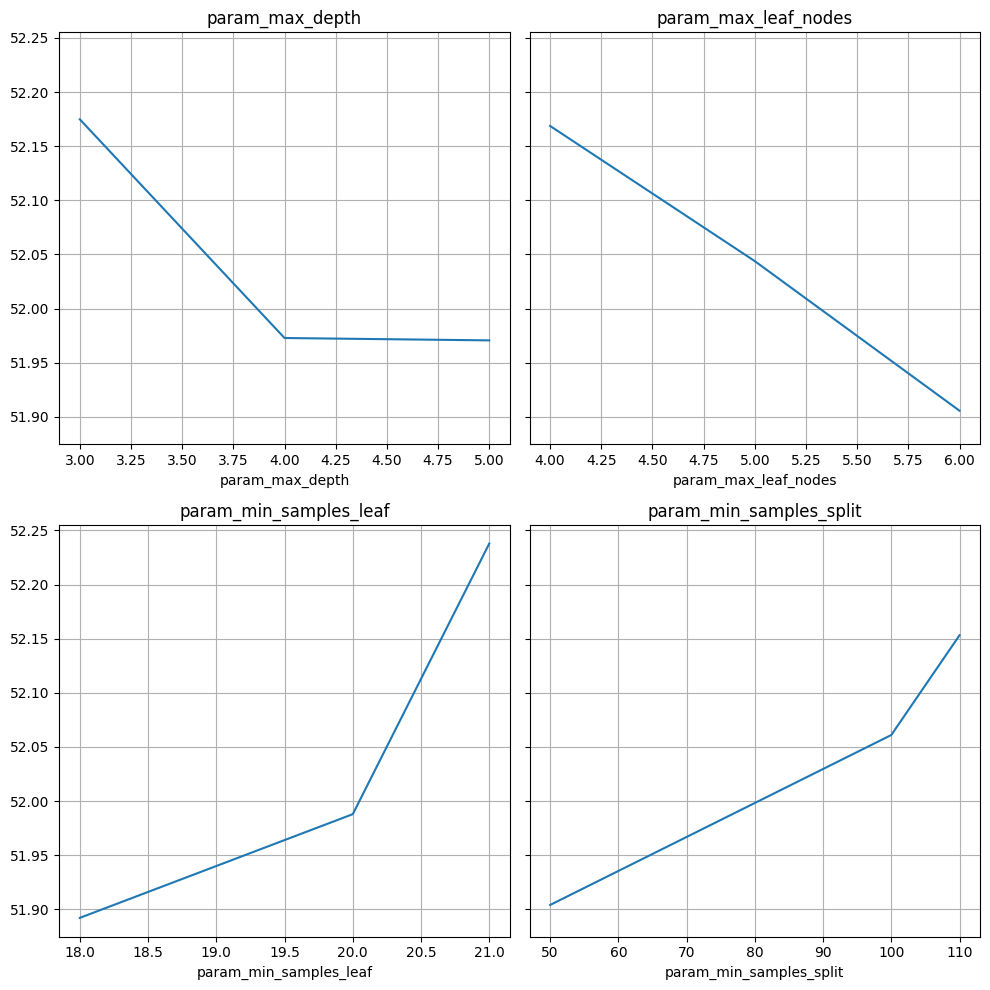

In [68]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [69]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

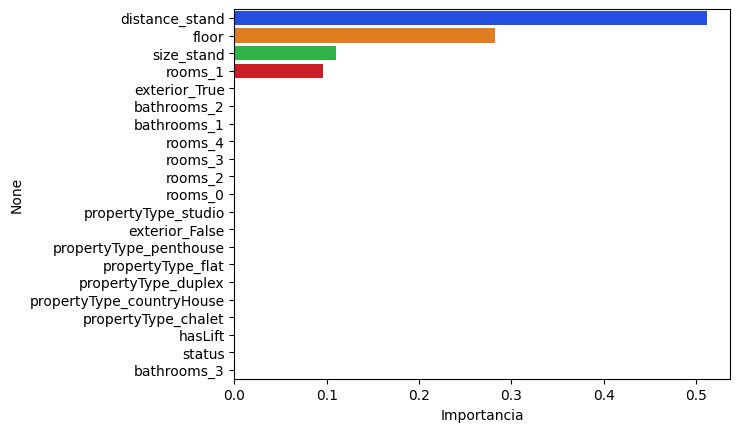

In [70]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

# Random Forest

In [71]:
params_rrf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,6,8],
    'max_depth': [10],
    'min_samples_split': [9],
    'min_samples_leaf': [40,60,80,100], 
    # 'max_leaf_nodes': [55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [88]:
modelo_final_rrf

RandomForestRegressor(max_depth=10, max_features=8, min_samples_leaf=40,
                      min_samples_split=9, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [72]:
params_rf = {
    'n_estimators': [35,50,75,115,110,120,150],
    'max_features': [3,5,7,10,15,18,20],
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [50,60,65],
    'min_samples_leaf': [19,21], 
    'max_leaf_nodes': [2,4,6]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [73]:
modelo_final_rf

RandomForestRegressor(max_depth=3, max_features=18, max_leaf_nodes=4,
                      min_samples_leaf=19, min_samples_split=50,
                      n_estimators=75, random_state=42)

In [74]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.231680,37.497896,2238.325938,47.310949
test,0.218827,36.831919,2209.499948,47.005318


# Gradient Booster

In [75]:
# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [115,150,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [76]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=20, min_samples_split=100,
                          n_estimators=115, random_state=42)

In [77]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.541104,27.999976,1336.888673,36.563488
test,0.272080,36.332028,2058.876749,45.374847


# XGB

In [78]:
from xgboost import XGBRegressor

In [79]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [80]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [81]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.519855,28.980401,1398.791960,37.400427
test,0.231720,36.658838,2173.032647,46.615798


## Mejor modelo RF: 

# Predicción completa

In [90]:
grid_search_complete = GridSearchCV(RandomForestRegressor(),
                                 param_grid=params_rf,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_complete.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 7, 9],
                         'max_features': [3, 5, 7, 10, 15, 18, 20],
                         'max_leaf_nodes': [2, 4, 6],
                         'min_samples_leaf': [19, 21],
                         'min_samples_split': [50, 60, 65],
                         'n_estimators': [35, 50, 75, 115, 110, 120, 150]},
             scoring='neg_mean_squared_error')

In [91]:
modelo_final_arbol_rf = grid_search_arbol_2.best_estimator_

In [92]:
modelo_final_arbol_rf

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=5, min_samples_leaf=18,
                      min_samples_split=100)

In [93]:
y_pred_final_rf = modelo_final_arbol_rf.predict(x)

In [94]:
metricas = {
    'train': {
        'r2_score': r2_score(y, y_pred_final_rf),
        'MAE': mean_absolute_error(y, y_pred_final_rf),
        'MSE': mean_squared_error(y, y_pred_final_rf),
        'RMSE': np.sqrt(mean_squared_error(y, y_pred_final_rf))
    }}

In [95]:
metricas= pd.DataFrame(metricas)
metricas.T

,r2_score,MAE,MSE,RMSE
train,0.242462,36.055022,2188.139173,46.77755
